

---

# **Data Science Assignment – Web3 Trading **

## **Bitcoin Market Sentiment Data**

---

In this notebook, we will step-by-step load, clean, merge, visualize, and generate insights from the data.

**Steps:**

1. Data Loading
2. Data Cleaning
3. Merging Datasets
4. Exploratory Data Analysis (EDA)
5. Visualization
6. Insights & Conclusion

---

# **1. Data Loading**

In [1]:
#  Libraries Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set(style='whitegrid')
print('Libraries imported successfully!')

Libraries imported successfully!


#1.1Initial Exploration of Sentiment Data

In [2]:
#  Load Data

sentiment_df = pd.read_csv('fear_greed_index.csv')
trader_df = pd.read_csv('historical_data.csv')

print('Sentiment Data Shape:', sentiment_df.shape)
print('Trader Data Shape:', trader_df.shape)

#Display the first 5 rows of each dataframe
sentiment_df.head(), trader_df.head()

Sentiment Data Shape: (2644, 4)
Trader Data Shape: (211224, 16)


(    timestamp  value classification        date
 0  1517463000     30           Fear  2018-02-01
 1  1517549400     15   Extreme Fear  2018-02-02
 2  1517635800     40           Fear  2018-02-03
 3  1517722200     24   Extreme Fear  2018-02-04
 4  1517808600     11   Extreme Fear  2018-02-05,
                                       Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY 

In [3]:
# Get a concise summary of the dataframe
print("Info about the sentiment data:")
sentiment_df.info()

Info about the sentiment data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [4]:
#  Display the last 5 rows to see if there are any summary rows or different formats at the end
print("\n Last 5 rows of the trader data:")
print(sentiment_df.tail())


 Last 5 rows of the trader data:
       timestamp  value classification        date
2639  1745818200     54        Neutral  2025-04-28
2640  1745904600     60          Greed  2025-04-29
2641  1745991000     56          Greed  2025-04-30
2642  1746077400     53        Neutral  2025-05-01
2643  1746163800     67          Greed  2025-05-02


In [5]:
# Get descriptive statistics
print("\n Descriptive statistics of the sentiment data:")
print(sentiment_df.describe(include='all')) # 'include="all"' shows stats for non-numeric columns too


 Descriptive statistics of the sentiment data:
           timestamp        value classification        date
count   2.644000e+03  2644.000000           2644        2644
unique           NaN          NaN              5        2644
top              NaN          NaN           Fear  2025-05-02
freq             NaN          NaN            781           1
mean    1.631899e+09    46.981089            NaN         NaN
std     6.597967e+07    21.827680            NaN         NaN
min     1.517463e+09     5.000000            NaN         NaN
25%     1.574811e+09    28.000000            NaN         NaN
50%     1.631900e+09    46.000000            NaN         NaN
75%     1.688989e+09    66.000000            NaN         NaN
max     1.746164e+09    95.000000            NaN         NaN


In [6]:
# Check for missing values
print("\n Missing values in each column:")
print(sentiment_df.isnull().sum())


 Missing values in each column:
timestamp         0
value             0
classification    0
date              0
dtype: int64


In [7]:
# Convert 'date' column to datetime objects
date_column_name = 'date'

if date_column_name in sentiment_df.columns:
  print(f"\n5. Converting '{date_column_name}' column to datetime objects...")
  try:
    print(f"First 5 values of '{date_column_name}' before conversion: \n{sentiment_df[date_column_name].head()}")
    sentiment_df[date_column_name] = pd.to_datetime(sentiment_df[date_column_name])
    print(f"'{date_column_name}' column converted successfully.")
    print(f"Data type of '{date_column_name}' column after conversion: {sentiment_df[date_column_name].dtype}")
  except Exception as e:
    print(f"Could not automatically convert '{date_column_name}'. Error: {e}")
    print("Please check the actual date format in your CSV.")
    print(f"First 5 values of '{date_column_name}' column (that failed conversion): \n{sentiment_df[date_column_name].head()}")

else:
  print(f"\nERROR: Column '{date_column_name}' not found in the sentiment data. Available columns are: {sentiment_df.columns.tolist()}")
  print("Please check the actual column name for dates in your CSV file and update 'date_column_name'.")


5. Converting 'date' column to datetime objects...
First 5 values of 'date' before conversion: 
0    2018-02-01
1    2018-02-02
2    2018-02-03
3    2018-02-04
4    2018-02-05
Name: date, dtype: object
'date' column converted successfully.
Data type of 'date' column after conversion: datetime64[ns]


In [8]:
#  Inspect unique values in 'classification' column
classification_column_name = 'classification'

if classification_column_name in sentiment_df.columns:
  print(f"\n6. Unique values in '{classification_column_name}' column:")
  print(sentiment_df[classification_column_name].unique())
  print("\nValue counts for classification:")
  print(sentiment_df[classification_column_name].value_counts())
else:
  print(f"\nERROR: Column '{classification_column_name}' not found. Available columns are: {sentiment_df.columns.tolist()}")
  print("Please check the actual column name for sentiment classification in your CSV file and update 'classification_column_name'.")





6. Unique values in 'classification' column:
['Fear' 'Extreme Fear' 'Neutral' 'Greed' 'Extreme Greed']

Value counts for classification:
classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64


In [9]:
# (Optional but good practice) Set 'Date' as index if conversion was successful
if date_column_name in sentiment_df.columns and pd.api.types.is_datetime64_any_dtype(sentiment_df[date_column_name]):
  print(f"\n7. Setting '{date_column_name}' as index...")
  sentiment_df.set_index(date_column_name, inplace=True)
  print("Index set successfully.")
  print("\nFirst 5 rows after setting index:")
  print(sentiment_df.head())
else:
  print(f"\nSkipping setting '{date_column_name}' as index because it's not in datetime format or not found.")


7. Setting 'date' as index...
Index set successfully.

First 5 rows after setting index:
             timestamp  value classification
date                                        
2018-02-01  1517463000     30           Fear
2018-02-02  1517549400     15   Extreme Fear
2018-02-03  1517635800     40           Fear
2018-02-04  1517722200     24   Extreme Fear
2018-02-05  1517808600     11   Extreme Fear


#1.2 Initial Exploration of Trader Data

In [10]:
 #  Get a concise summary of the dataframe (column names, non-null counts, data types)
print("Info about the trader data:")
trader_df.info(verbose=True, show_counts=True)

Info about the trader data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float

In [11]:
#  Display the last 5 rows to see if there are any summary rows or different formats at the end
print("\n Last 5 rows of the trader data:")
print(trader_df.tail())


 Last 5 rows of the trader data:
                                           Account      Coin  Execution Price  \
211219  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN            1.101   
211220  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN            1.101   
211221  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN            1.101   
211222  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN            1.101   
211223  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN            1.101   

        Size Tokens  Size USD  Side     Timestamp IST  Start Position  \
211219        382.2    420.80  SELL  25-04-2025 15:35          7546.6   
211220       2124.1   2338.63  SELL  25-04-2025 15:35          7164.4   
211221        423.4    466.16  SELL  25-04-2025 15:35          5040.3   
211222       3599.8   3963.38  SELL  25-04-2025 15:35          4616.9   
211223       1017.1   1119.83  SELL  25-04-2025 15:35          1017.1   

         Direction  Closed PnL  \
211219

In [12]:
#  Get descriptive statistics for numerical columns
print("\n Descriptive statistics (numerical columns):")
print(trader_df.describe())


 Descriptive statistics (numerical columns):
       Execution Price   Size Tokens      Size USD  Start Position  \
count    211224.000000  2.112240e+05  2.112240e+05    2.112240e+05   
mean      11414.723350  4.623365e+03  5.639451e+03   -2.994625e+04   
std       29447.654868  1.042729e+05  3.657514e+04    6.738074e+05   
min           0.000005  8.740000e-07  0.000000e+00   -1.433463e+07   
25%           4.854700  2.940000e+00  1.937900e+02   -3.762311e+02   
50%          18.280000  3.200000e+01  5.970450e+02    8.472793e+01   
75%         101.580000  1.879025e+02  2.058960e+03    9.337278e+03   
max      109004.000000  1.582244e+07  3.921431e+06    3.050948e+07   

          Closed PnL      Order ID            Fee      Trade ID     Timestamp  
count  211224.000000  2.112240e+05  211224.000000  2.112240e+05  2.112240e+05  
mean       48.749001  6.965388e+10       1.163967  5.628549e+14  1.737744e+12  
std       919.164828  1.835753e+10       6.758854  3.257565e+14  8.689920e+09  
min

In [13]:
# Get descriptive statistics for object/categorical columns
print("\n Descriptive statistics (object/categorical columns):")
print(trader_df.describe(include=['object', 'category']))


 Descriptive statistics (object/categorical columns):
                                           Account    Coin    Side  \
count                                       211224  211224  211224   
unique                                          32     246       2   
top     0xbee1707d6b44d4d52bfe19e41f8a828645437aab    HYPE    SELL   
freq                                         40184   68005  108528   

           Timestamp IST  Direction  \
count             211224     211224   
unique             27977         12   
top     14-02-2025 00:31  Open Long   
freq                 441      49895   

                                         Transaction Hash  
count                                              211224  
unique                                             101184  
top     0x00000000000000000000000000000000000000000000...  
freq                                                 9032  


In [14]:
# Check for missing values in each column
print("\n6. Missing values in each column (count and percentage):")
missing_values = trader_df.isnull().sum()
missing_percentage = (missing_values / len(trader_df)) * 100
missing_info = pd.DataFrame({'Missing Count': missing_values, 'Missing Percentage': missing_percentage})
print(missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False))
if missing_info['Missing Count'].sum() == 0:
    print("No missing values found in trader data.")


6. Missing values in each column (count and percentage):
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []
No missing values found in trader data.


In [15]:
# 7. Identify unique values for key categorical columns (to understand their nature)
potential_categorical_cols = ['account', 'symbol', 'side', 'event', 'startPositionState']

print("\n7. Unique values in some potential categorical columns:")
for col in potential_categorical_cols:
  if col in trader_df.columns:
    print(f"\n--- Unique values for '{col}' (top 5 and count) ---")
    # Checks if the column is entirely NaN, which can cause errors with value_counts
    if trader_df[col].notna().any():
      unique_vals = trader_df[col].unique()
      print(f"Number of unique values: {len(unique_vals)}")
      if len(unique_vals) > 10: # Show only first 10 if many unique values
        print(f"Sample unique values: {unique_vals[:10]}")
      else:
        print(f"Unique values: {unique_vals}")
        print("Value counts (top 5):")
        print(trader_df[col].value_counts().nlargest(5))
    else:
      print(f"Column '{col}' contains only NaN values.")
  else:
    print(f"Column '{col}' not found in trader_df.")





7. Unique values in some potential categorical columns:
Column 'account' not found in trader_df.
Column 'symbol' not found in trader_df.
Column 'side' not found in trader_df.
Column 'event' not found in trader_df.
Column 'startPositionState' not found in trader_df.


In [16]:
# 8. Specifically look at the 'time' column for conversion to datetime

time_column_name = 'time'

if time_column_name in trader_df.columns:
  print(f"\n8. Inspecting '{time_column_name}' column for datetime conversion:")
  print(f"Data type of '{time_column_name}' before conversion: {trader_df[time_column_name].dtype}")
  print(f"First 5 values of '{time_column_name}': \n{trader_df[time_column_name].head()}")
  # Attempt conversion. Timestamps from APIs can be in various formats:
  # We'll need to inspect the values to decide on the conversion method.
  # If it looks like a large integer, it's likely a Unix timestamp.
  # For now, we just inspect. Conversion will be a dedicated step if needed.
  if pd.api.types.is_numeric_dtype(trader_df[time_column_name]):
    # Potentially a Unix timestamp. Let's try converting the first few to see.
    try:
      # Assuming it might be milliseconds, common in APIs
      print("Attempting to interpret numeric 'time' as Unix timestamp (milliseconds):")
      example_conversion_ms = pd.to_datetime(trader_df[time_column_name].iloc[0], unit='ms')
      print(f"Example (first value as ms): {trader_df[time_column_name].iloc[0]} -> {example_conversion_ms}")
      # Assuming it might be seconds
      example_conversion_s = pd.to_datetime(trader_df[time_column_name].iloc[0], unit='s')
      print(f"Example (first value as s): {trader_df[time_column_name].iloc[0]} -> {example_conversion_s}")
    except Exception as e:
      print(f"Could not interpret numeric 'time' as standard Unix timestamp: {e}")
  elif pd.api.types.is_object_dtype(trader_df[time_column_name]):
    print("The 'time' column is of object type, likely string. Conversion to datetime will be attempted later if needed.")
    # pd.to_datetime() is usually good at inferring string formats, but we might need to specify.

  else:
    print(f"\nERROR: Column '{time_column_name}' not found. Available columns: {trader_df.columns.tolist()}")
    print("Please check the actual column name for time in your CSV file and update 'time_column_name'.")

In [17]:
print(trader_df.head())

                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec0945

# **2. Data Cleaning**

# 2.1Preprocess Trader Data Renaming, Time Conversion

In [18]:
trader_df_processed = trader_df.copy()

# 1. Standardize Column Names
print("Original column names:\n", trader_df_processed.columns.tolist())

column_rename_map = {
    'Account': 'account',
    'Coin': 'symbol',
    'Execution Price': 'execution_price',
    'Size Tokens': 'size_tokens',
    'Size USD': 'size_usd',
    'Side': 'side',
    'Timestamp IST': 'time_ist',
    'Start Position': 'start_position_tokens',
    'Direction': 'event_type',
    'Closed PnL': 'closed_pnl',
    'Transaction Hash': 'tx_hash',
    'Order ID': 'order_id',
    'Crossed': 'crossed_maker_taker',
    'Fee': 'fee',
    'Trade ID': 'trade_id',
    'Timestamp': 'timestamp_unix'
}
trader_df_processed.rename(columns=column_rename_map, inplace=True)
print("\nNew column names:\n", trader_df_processed.columns.tolist())

Original column names:
 ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']

New column names:
 ['account', 'symbol', 'execution_price', 'size_tokens', 'size_usd', 'side', 'time_ist', 'start_position_tokens', 'event_type', 'closed_pnl', 'tx_hash', 'order_id', 'crossed_maker_taker', 'fee', 'trade_id', 'timestamp_unix']


In [19]:
# 2. Convert 'timestamp_unix' to Datetime
# 'timestamp_unix' is very likely in MILLISECONDS.

print("\nConverting 'timestamp_unix' to datetime...")
# Check for NaNs or unconvertible values before conversion if necessary
try:
    trader_df_processed['time'] = pd.to_datetime(trader_df_processed['timestamp_unix'], unit='ms')
    print("Successfully converted 'timestamp_unix' to 'time' (datetime64[ns]).")
    print("First 5 'time' values:\n", trader_df_processed['time'].head())
    print("Last 5 'time' values:\n", trader_df_processed['time'].tail())

    # Create a 'date' column for merging with sentiment data
    trader_df_processed['date'] = trader_df_processed['time'].dt.date
    trader_df_processed['date'] = pd.to_datetime(trader_df_processed['date']) # Ensure it's datetime type
    print("\nCreated 'date' column from 'time'.")
    print("First 5 'date' values:\n", trader_df_processed['date'].head())

except OverflowError as oe:
    print(f"OverflowError during timestamp conversion: {oe}")
    print("This can happen if timestamps are too large for standard datetime64[ns] or unit is wrong.")
    print("Min timestamp_unix:", trader_df_processed['timestamp_unix'].min())
    print("Max timestamp_unix:", trader_df_processed['timestamp_unix'].max())
except Exception as e:
    print(f"Error converting 'timestamp_unix': {e}")


Converting 'timestamp_unix' to datetime...
Successfully converted 'timestamp_unix' to 'time' (datetime64[ns]).
First 5 'time' values:
 0   2024-10-27 03:33:20
1   2024-10-27 03:33:20
2   2024-10-27 03:33:20
3   2024-10-27 03:33:20
4   2024-10-27 03:33:20
Name: time, dtype: datetime64[ns]
Last 5 'time' values:
 211219   2025-06-15 15:06:40
211220   2025-06-15 15:06:40
211221   2025-06-15 15:06:40
211222   2025-06-15 15:06:40
211223   2025-06-15 15:06:40
Name: time, dtype: datetime64[ns]

Created 'date' column from 'time'.
First 5 'date' values:
 0   2024-10-27
1   2024-10-27
2   2024-10-27
3   2024-10-27
4   2024-10-27
Name: date, dtype: datetime64[ns]


In [20]:
# 3. Brief check of data types after changes
print("\nInfo after renaming and time conversion:")
trader_df_processed.info()


Info after renaming and time conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   account                211224 non-null  object        
 1   symbol                 211224 non-null  object        
 2   execution_price        211224 non-null  float64       
 3   size_tokens            211224 non-null  float64       
 4   size_usd               211224 non-null  float64       
 5   side                   211224 non-null  object        
 6   time_ist               211224 non-null  object        
 7   start_position_tokens  211224 non-null  float64       
 8   event_type             211224 non-null  object        
 9   closed_pnl             211224 non-null  float64       
 10  tx_hash                211224 non-null  object        
 11  order_id               211224 non-null  int64         
 12  cr

In [21]:
# 4. Quick check of negative fees
negative_fees = trader_df_processed[trader_df_processed['fee'] < 0]
print(f"\nNumber of rows with negative fees: {len(negative_fees)}")
if len(negative_fees) > 0:
    print("Sample of rows with negative fees:")
    print(negative_fees[['account', 'symbol', 'side', 'event_type', 'closed_pnl', 'fee', 'time']].head())


Number of rows with negative fees: 2476
Sample of rows with negative fees:
                                          account symbol  side  event_type  \
28806  0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4   RUNE  SELL  Open Short   
28807  0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4   ONDO   BUY   Open Long   
28808  0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4   ONDO   BUY   Open Long   
28809  0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4   ONDO   BUY   Open Long   
28810  0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4   ONDO   BUY   Open Long   

       closed_pnl       fee                time  
28806         0.0 -0.128604 2024-03-09 16:00:00  
28807         0.0 -0.076930 2024-03-09 16:00:00  
28808         0.0 -0.001354 2024-03-09 16:00:00  
28809         0.0 -0.107332 2024-03-09 16:00:00  
28810         0.0 -0.000542 2024-03-09 16:00:00  


In [22]:
# 5. Display the first few rows of the processed dataframe
print("\nFirst 5 rows of trader_df_processed:")
print(trader_df_processed.head())


First 5 rows of trader_df_processed:
                                      account symbol  execution_price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   @107           7.9894   

   size_tokens  size_usd side          time_ist  start_position_tokens  \
0       986.87   7872.16  BUY  02-12-2024 22:50               0.000000   
1        16.00    127.68  BUY  02-12-2024 22:50             986.524596   
2       144.09   1150.63  BUY  02-12-2024 22:50            1002.518996   
3       142.98   1142.04  BUY  02-12-2024 22:50            1146.558564   
4         8.73     69.75  BUY  02-12-2024 22:50            1289.488521   

  event_type  closed_pnl                                            tx_hash  \

#2.2 Further Exploration of Processed Trader Data: Symbols and Event Types

In [23]:
# Further Explore Trader Data: Symbol, Event Type

print("--- Exploring 'symbol' (Coin Names) ---")
unique_symbols = trader_df_processed['symbol'].unique()
print(f"Number of unique symbols: {len(unique_symbols)}")
print(f"Sample unique symbols (first 30): \n{unique_symbols[:30]}")
print("\nValue counts for 'symbol' (top 10):")
print(trader_df_processed['symbol'].value_counts().nlargest(10))

--- Exploring 'symbol' (Coin Names) ---
Number of unique symbols: 246
Sample unique symbols (first 30): 
['@107' 'AAVE' 'DYDX' 'AIXBT' 'GMX' 'EIGEN' 'HYPE' 'SOL' 'SUI' 'DOGE'
 'ETH' 'kPEPE' 'TRUMP' 'ONDO' 'ENA' 'LINK' 'XRP' 'S' 'BNB' 'BERA' 'WIF'
 'LAYER' 'MKR' 'KAITO' 'IP' 'JUP' 'USUAL' 'ADA' 'BTC' 'PURR/USDC']

Value counts for 'symbol' (top 10):
symbol
HYPE         68005
@107         29992
BTC          26064
ETH          11158
SOL          10691
FARTCOIN      4650
MELANIA       4428
PURR/USDC     2774
WLD           1983
SUI           1979
Name: count, dtype: int64


In [24]:
# Let's specifically look for Bitcoin-related symbols
# Common BTC symbols: BTC, XBT, WBTC, BTC-PERP, BTC/USD, BTC/USDT, etc.
btc_related_symbols = [s for s in unique_symbols if 'BTC' in str(s).upper() or 'XBT' in str(s).upper()]
print(f"\nPotential Bitcoin-related symbols found ({len(btc_related_symbols)}):")
print(btc_related_symbols)


Potential Bitcoin-related symbols found (2):
['AIXBT', 'BTC']


In [25]:
print("\n--- Exploring 'event_type' (Original 'Direction' Column) ---")
unique_event_types = trader_df_processed['event_type'].unique()
print(f"Number of unique event_types: {len(unique_event_types)}")
print("Unique event_types:")
print(unique_event_types)
print("\nValue counts for 'event_type':")
print(trader_df_processed['event_type'].value_counts())


--- Exploring 'event_type' (Original 'Direction' Column) ---
Number of unique event_types: 12
Unique event_types:
['Buy' 'Sell' 'Open Long' 'Close Long' 'Spot Dust Conversion' 'Open Short'
 'Close Short' 'Long > Short' 'Short > Long' 'Auto-Deleveraging'
 'Liquidated Isolated Short' 'Settlement']

Value counts for 'event_type':
event_type
Open Long                    49895
Close Long                   48678
Open Short                   39741
Close Short                  36013
Sell                         19902
Buy                          16716
Spot Dust Conversion           142
Short > Long                    70
Long > Short                    57
Auto-Deleveraging                8
Liquidated Isolated Short        1
Settlement                       1
Name: count, dtype: int64


In [26]:
print("\n--- Exploring 'start_position_tokens' relationship with 'side' and 'pnl' (a quick look) ---")

print("Sample of 'Open Long' events:")
print(trader_df_processed[trader_df_processed['event_type'] == 'Open Long'][['start_position_tokens', 'size_tokens', 'side', 'closed_pnl']].head())

print("\nSample of 'Open Short' events:")
print(trader_df_processed[trader_df_processed['event_type'] == 'Open Short'][['start_position_tokens', 'size_tokens', 'side', 'closed_pnl']].head())

print("\nSample of 'Close Long' events (expecting positive start_position_tokens, non-zero pnl):")
print(trader_df_processed[trader_df_processed['event_type'] == 'Close Long'][['start_position_tokens', 'size_tokens', 'side', 'closed_pnl']].head())

print("\nSample of 'Close Short' events (expecting negative start_position_tokens, non-zero pnl):")
print(trader_df_processed[trader_df_processed['event_type'] == 'Close Short'][['start_position_tokens', 'size_tokens', 'side', 'closed_pnl']].head())


--- Exploring 'start_position_tokens' relationship with 'side' and 'pnl' (a quick look) ---
Sample of 'Open Long' events:
    start_position_tokens  size_tokens side  closed_pnl
64                   0.00         7.47  BUY         0.0
65                   7.47         9.02  BUY         0.0
66                  16.49         7.72  BUY         0.0
67                  24.21         3.66  BUY         0.0
68                  27.87        15.45  BUY         0.0

Sample of 'Open Short' events:
     start_position_tokens  size_tokens  side  closed_pnl
563                   0.00       711.15  SELL         0.0
564                -711.15      3871.46  SELL         0.0
565               -4582.61        10.85  SELL         0.0
566               -4593.46      2902.07  SELL         0.0
567               -7495.53      1573.23  SELL         0.0

Sample of 'Close Long' events (expecting positive start_position_tokens, non-zero pnl):
     start_position_tokens  size_tokens  side  closed_pnl
142           

In [27]:
# Checsk if 'Liquidated' is an event type
if 'Liquidated' in unique_event_types:
    print("\nSample of 'Liquidated' events:")
    print(trader_df_processed[trader_df_processed['event_type'] == 'Liquidated'].head())
else:
    print("\n'Liquidated' not found as a distinct event_type. It might be part of other events or not explicitly logged as such.")


'Liquidated' not found as a distinct event_type. It might be part of other events or not explicitly logged as such.


#2.3 Filtering for Bitcoin Trades and Defining PnL-Realizing Events

In [28]:
# 1. Filter for Bitcoin-related symbols
btc_symbols_to_use = ['BTC', 'AIXBT']
trader_df_btc = trader_df_processed[trader_df_processed['symbol'].isin(btc_symbols_to_use)].copy()

print(f"Original trader data entries: {len(trader_df_processed)}")
print(f"Trader data entries for BTC and AIXBT: {len(trader_df_btc)}")

Original trader data entries: 211224
Trader data entries for BTC and AIXBT: 26883


In [29]:
if len(trader_df_btc) == 0:
    print("\nWARNING: No data found for BTC or AIXBT. Please check the symbol list and data.")
    # Potentially halt or handle this case
else:
    print("\nSuccessfully filtered for Bitcoin-related trades.")
    print("Unique symbols in filtered data:", trader_df_btc['symbol'].unique())


Successfully filtered for Bitcoin-related trades.
Unique symbols in filtered data: ['AIXBT' 'BTC']


In [30]:
# 2. Examine 'Buy' and 'Sell' event_types in the BTC dataset
# Check their closed_pnl and start_position_tokens behavior

print("\n--- Examining 'Buy' events in BTC data ---")
buy_events_btc = trader_df_btc[trader_df_btc['event_type'] == 'Buy']
print(f"Number of 'Buy' events in BTC data: {len(buy_events_btc)}")
if len(buy_events_btc) > 0:
    print("Sample of 'Buy' events in BTC data:")
    print(buy_events_btc[['start_position_tokens', 'size_tokens', 'side', 'closed_pnl', 'time']].head())
    print(f"Are all 'closed_pnl' for 'Buy' events zero? {all(buy_events_btc['closed_pnl'] == 0)}")


--- Examining 'Buy' events in BTC data ---
Number of 'Buy' events in BTC data: 0


In [31]:
print("\n--- Examining 'Sell' events in BTC data ---")
sell_events_btc = trader_df_btc[trader_df_btc['event_type'] == 'Sell']
print(f"Number of 'Sell' events in BTC data: {len(sell_events_btc)}")
if len(sell_events_btc) > 0:
    print("Sample of 'Sell' events in BTC data:")
    print(sell_events_btc[['start_position_tokens', 'size_tokens', 'side', 'closed_pnl', 'time']].head())
    print(f"Are all 'closed_pnl' for 'Sell' events zero? {all(sell_events_btc['closed_pnl'] == 0)}")


--- Examining 'Sell' events in BTC data ---
Number of 'Sell' events in BTC data: 0


In [32]:
# 3. Define PnL-realizing event types
# Based on previous exploration, these are the primary ones.
pnl_event_types = ['Close Long', 'Close Short', 'Liquidated Isolated Short']
# let's check ADL PnL
adl_events_btc = trader_df_btc[trader_df_btc['event_type'] == 'Auto-Deleveraging']
if len(adl_events_btc) > 0:
    print("\n--- Examining 'Auto-Deleveraging' events in BTC data for PnL ---")
    print(adl_events_btc[['start_position_tokens', 'size_tokens', 'side', 'closed_pnl', 'time']].head())
    if not all(adl_events_btc['closed_pnl'] == 0):
        print("'Auto-Deleveraging' events HAVE non-zero PnL. Adding to pnl_event_types.")
        if 'Auto-Deleveraging' not in pnl_event_types:
             pnl_event_types.append('Auto-Deleveraging')
    else:
        print("'Auto-Deleveraging' events have zero PnL in this sample/all.")
else:
    print("\nNo 'Auto-Deleveraging' events found in BTC data to examine for PnL.")


No 'Auto-Deleveraging' events found in BTC data to examine for PnL.


In [33]:
# From now on, for PnL analysis, we will primarily use 'trader_df_btc'
# and often filter by these pnl_event_types.
if len(trader_df_btc) > 0:
    print("\n`trader_df_btc` is ready for merging and further analysis.")
    print("First 5 rows of `trader_df_btc`:")
    print(trader_df_btc.head())
else:
    print("\n`trader_df_btc` is empty. Cannot proceed with BTC-specific analysis without data.")


`trader_df_btc` is ready for merging and further analysis.
First 5 rows of `trader_df_btc`:
                                        account symbol  execution_price  \
277  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  AIXBT         0.069298   
278  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  AIXBT         0.069302   
279  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  AIXBT         0.069305   
280  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  AIXBT         0.069307   
281  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  AIXBT         0.069344   

     size_tokens  size_usd side          time_ist  start_position_tokens  \
277       7202.0    499.08  BUY  08-04-2025 22:27                    0.0   
278      11279.0    781.66  BUY  08-04-2025 22:27                 7202.0   
279       9024.0    625.41  BUY  08-04-2025 22:27                18481.0   
280      21641.0   1499.87  BUY  08-04-2025 22:27                27505.0   
281       2480.0    171.97  BUY  08-04-2025 22:27                49146.0   


# **3. Merging Processed**

# 3.1 Merging Processed Trader Data with Sentiment Data

In [34]:
# Merge Processed Bitcoin Trader Data with Sentiment Data

print("--- Merging Bitcoin Trader Data with Sentiment Data ---")

if 'sentiment_df' not in locals() or 'trader_df_btc' not in locals():
 print("ERROR: One or both dataframes (sentiment_df, trader_df_btc) not found. Please re-run previous steps.")
else:
  print(f"Shape of trader_df_btc before merge: {trader_df_btc.shape}")
  print(f"Shape of sentiment_df before merge: {sentiment_df.shape}")
  print(f"Trader data date range: {trader_df_btc['date'].min()} to {trader_df_btc['date'].max()}")
  print(f"Sentiment data date range: {sentiment_df.index.min()} to {sentiment_df.index.max()}")

  # Performing a left merge: keeping all trader records, adding sentiment if date matches
  # merging trader_df_btc's 'date' column with sentiment_df's index (which is also date)
  merged_df = pd.merge(
      trader_df_btc,
      sentiment_df,
      left_on='date',
      right_index=True,
      how='left'
  )

  print(f"\nShape of merged_df after merge: {merged_df.shape}")

  # Check for rows where sentiment data might be missing
  missing_sentiment_after_merge = merged_df['classification'].isnull().sum()
  print(f"\nNumber of rows in merged_df with missing sentiment data (classification is null): {missing_sentiment_after_merge}")
  if missing_sentiment_after_merge > 0:
    print("This can happen if trade dates fall outside the range of the sentiment data.")
    # Show some rows where sentiment is missing
    print("Sample of rows with missing sentiment data:")
    print(merged_df[merged_df['classification'].isnull()][['time', 'date', 'symbol', 'event_type', 'value', 'classification']].head())

  # Pandas might add suffixes if there were overlapping column names (other than the merge key)
  # In this case, sentiment_df had 'value' and 'classification'.
  # If these names clashed with trader_df_btc, they might be auto-renamed.
  # Let's check the columns of merged_df.
  print("\nColumns in merged_df:")
  print(merged_df.columns.tolist())

  # We expect 'value' (the numerical sentiment score) and 'classification' (Fear/Greed text)
  # from sentiment_df to be in merged_df. If they got suffixes, we might want to rename.
  # For now, let's assume they are named 'value' and 'classification'.

  print("\n--- First 5 rows of merged_df (with sentiment) ---")
  # few key columns to display to verify merge
  print(merged_df[[
      'time', 'date', 'symbol', 'event_type', 'closed_pnl', # from trader
      'value', 'classification'                             # from sentime
  ]].head())

  print("\n--- Last 5 rows of merged_df (with sentiment) ---")
  print(merged_df[[
      'time', 'date', 'symbol', 'event_type', 'closed_pnl',
      'value', 'classification'
  ]].tail())


  # Checking data types in merged_df again, especially for new columns
  print("\nInfo of merged_df:")
  merged_df.info()

--- Merging Bitcoin Trader Data with Sentiment Data ---
Shape of trader_df_btc before merge: (26883, 18)
Shape of sentiment_df before merge: (2644, 3)
Trader data date range: 2023-11-14 00:00:00 to 2025-06-15 00:00:00
Sentiment data date range: 2018-02-01 00:00:00 to 2025-05-02 00:00:00

Shape of merged_df after merge: (26883, 21)

Number of rows in merged_df with missing sentiment data (classification is null): 6121
This can happen if trade dates fall outside the range of the sentiment data.
Sample of rows with missing sentiment data:
                   time       date symbol event_type  value classification
372 2025-06-15 15:06:40 2025-06-15  AIXBT  Open Long    NaN            NaN
373 2025-06-15 15:06:40 2025-06-15  AIXBT  Open Long    NaN            NaN
374 2025-06-15 15:06:40 2025-06-15  AIXBT  Open Long    NaN            NaN
375 2025-06-15 15:06:40 2025-06-15  AIXBT  Open Long    NaN            NaN
376 2025-06-15 15:06:40 2025-06-15  AIXBT  Open Long    NaN            NaN

Columns

# **4. Exploratory Data Analysis (EDA)**

# 4.1 Exploratory Data Analysis (EDA)

In [35]:
!pip install seaborn
!pip install matplotlib

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
# Exploratory Data Analysis

# 1. Create df_analysis: Filter merged_df for rows where sentiment data is available
df_analysis = merged_df.dropna(subset=['classification', 'value']).copy()
print(f"Number of rows in merged_df: {len(merged_df)}")
print(f"Number of rows in df_analysis (with sentiment data): {len(df_analysis)}")

Number of rows in merged_df: 26883
Number of rows in df_analysis (with sentiment data): 20762


In [38]:
# 2. Focus on PnL-Realizing Events within df_analysis
# pnl_event_types = ['Close Long', 'Close Short', 'Liquidated Isolated Short'] (defined earlier)
df_pnl_events = df_analysis[df_analysis['event_type'].isin(pnl_event_types)].copy()
print(f"Number of PnL-realizing events in df_analysis: {len(df_pnl_events)}")
if len(df_pnl_events) == 0:
  print("WARNING: No PnL-realizing events found in the data with sentiment. EDA will be limited.")
else:
  print("Unique event types in df_pnl_events:", df_pnl_events['event_type'].unique())

Number of PnL-realizing events in df_analysis: 8524
Unique event types in df_pnl_events: ['Close Long' 'Close Short']



--- Sentiment Distribution for PnL-Realizing Events ---


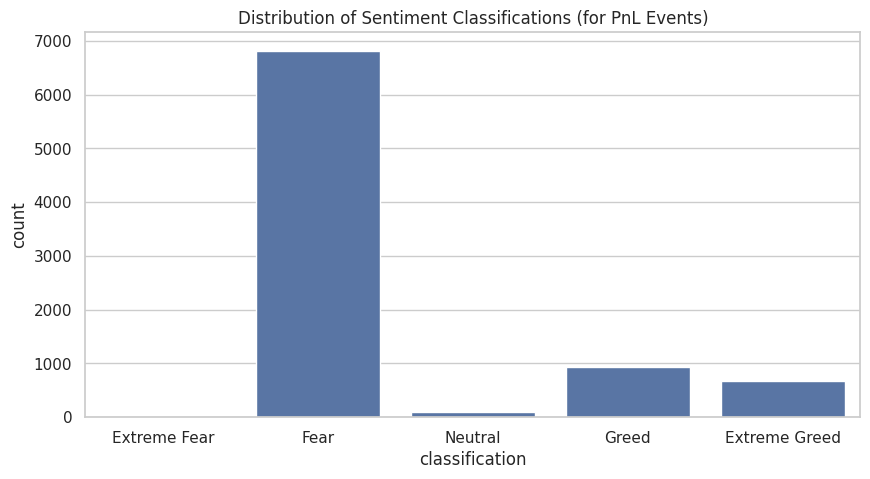

In [39]:
# 3. Analyze Sentiment Distribution in df_pnl_events
if len(df_pnl_events) > 0:
  print("\n--- Sentiment Distribution for PnL-Realizing Events ---")
  plt.figure(figsize=(10, 5))
  sns.countplot(data=df_pnl_events, x='classification', order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
  plt.title('Distribution of Sentiment Classifications (for PnL Events)')
  plt.show()

else:
    print("Skipping EDA Part 2 as df_pnl_events is empty.")

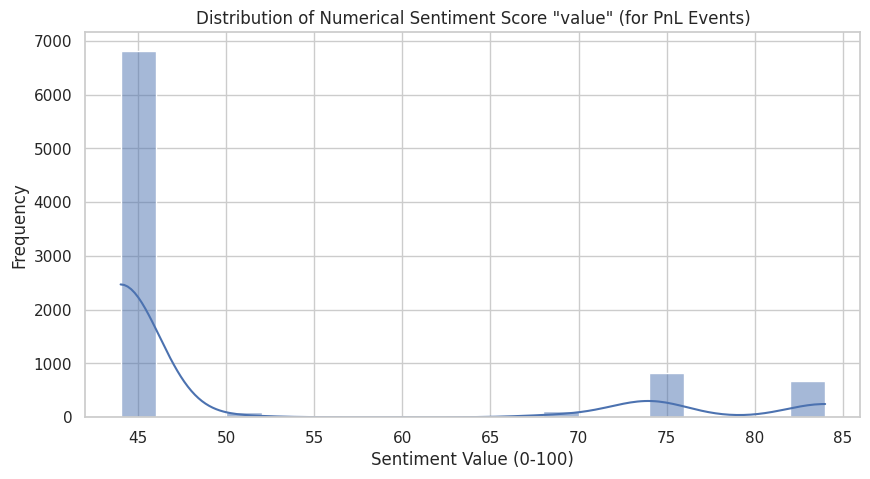

In [40]:
if len(df_pnl_events) > 0:
  plt.figure(figsize=(10, 5))
  sns.histplot(data=df_pnl_events, x='value', bins=20, kde=True)
  plt.title('Distribution of Numerical Sentiment Score "value" (for PnL Events)')
  plt.xlabel('Sentiment Value (0-100)')
  plt.ylabel('Frequency')
  plt.show()

else:
    print("Skipping EDA Part 2 as df_pnl_events is empty.")

In [41]:
if len(df_pnl_events) > 0:
  # 4. Overall Trader Performance for PnL-Realizing Events in df_pnl_events
  print("\n--- Overall Trader Performance (PnL Events with Sentiment) ---")
  total_pnl = df_pnl_events['closed_pnl'].sum()
  average_pnl = df_pnl_events['closed_pnl'].mean()
  median_pnl = df_pnl_events['closed_pnl'].median()
  std_dev_pnl = df_pnl_events['closed_pnl'].std()

else:
    print("Skipping EDA Part 2 as df_pnl_events is empty.")


--- Overall Trader Performance (PnL Events with Sentiment) ---


Total Closed PnL: 710,690.32
Number of PnL Events: 8524
Average PnL per Event: 83.38
Median PnL per Event: 6.42
Standard Deviation of PnL: 708.85
Overall Win Rate: 86.65%


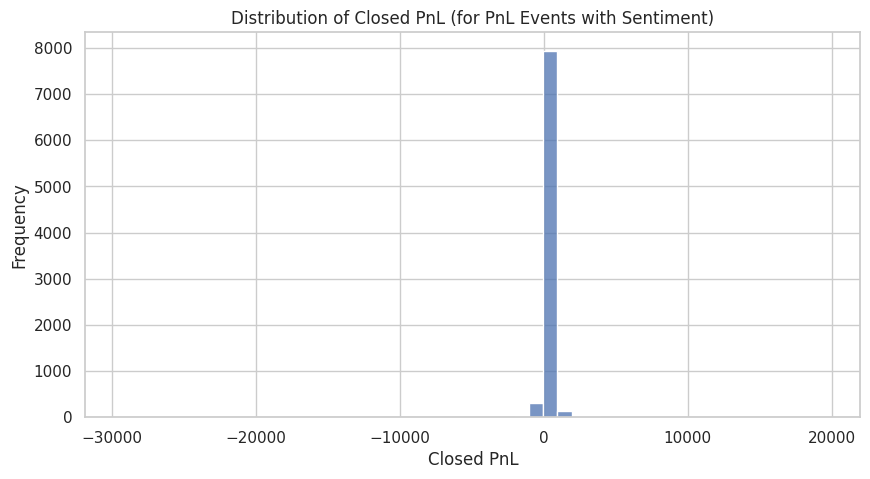

In [42]:
if len(df_pnl_events) > 0:

  # Win Rate
  df_pnl_events['is_win'] = df_pnl_events['closed_pnl'] > 0
  win_rate = df_pnl_events['is_win'].mean() * 100

  print(f"Total Closed PnL: {total_pnl:,.2f}")
  print(f"Number of PnL Events: {len(df_pnl_events)}")
  print(f"Average PnL per Event: {average_pnl:,.2f}")
  print(f"Median PnL per Event: {median_pnl:,.2f}")
  print(f"Standard Deviation of PnL: {std_dev_pnl:,.2f}")
  print(f"Overall Win Rate: {win_rate:.2f}%")

  plt.figure(figsize=(10, 5))
  sns.histplot(df_pnl_events['closed_pnl'], bins=50, kde=False) # KDE might be slow with outliers
  plt.title('Distribution of Closed PnL (for PnL Events with Sentiment)')
  plt.xlabel('Closed PnL')
  plt.ylabel('Frequency')

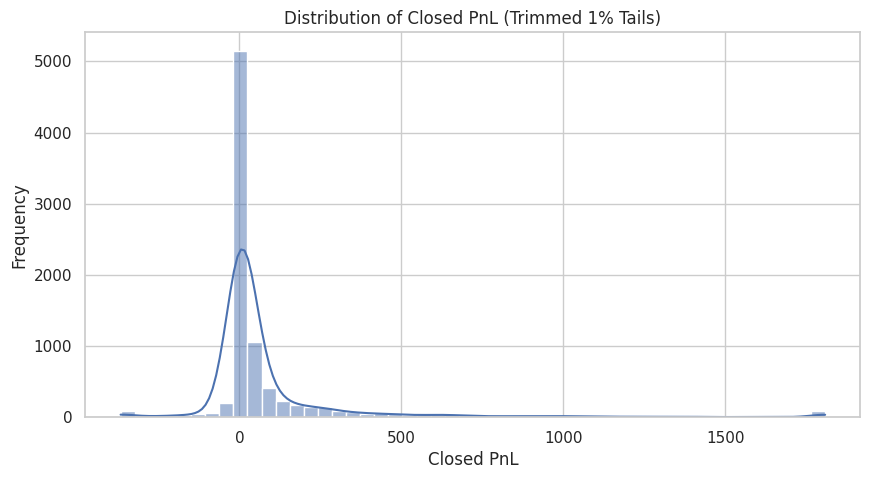

In [43]:

if len(df_pnl_events) > 0:

    # Consider showing a version with outliers trimmed for better visualization of the bulk
    pnl_trimmed = df_pnl_events['closed_pnl'].clip(lower=df_pnl_events['closed_pnl'].quantile(0.01),
                                               upper=df_pnl_events['closed_pnl'].quantile(0.99))
    plt.figure(figsize=(10,5))
    sns.histplot(pnl_trimmed, bins=50, kde=True)
    plt.title('Distribution of Closed PnL (Trimmed 1% Tails)')
    plt.xlabel('Closed PnL')
    plt.ylabel('Frequency')
    plt.show()

else:
    print("Skipping EDA on PnL events as df_pnl_events is empty.")

# **5. Visualization**

#5.1 Trader Performance by Market Sentiment

In [44]:
if len(df_pnl_events) > 0:
  print("\n--- Performance by Sentiment Classification ---")
  # Group by sentiment classification
  performance_by_classification = df_pnl_events.groupby('classification')['closed_pnl'].agg(
      count='count',
      sum_pnl='sum',
      mean_pnl='mean',
      median_pnl='median',
      std_pnl='std'
  ).reset_index()

else:
  print("Skipping EDA Part 2 as df_pnl_events is empty.")


--- Performance by Sentiment Classification ---


In [45]:
if len(df_pnl_events) > 0:
   # Calculate win rate for each classification
   win_rate_by_classification = df_pnl_events.groupby('classification')['is_win'].mean().reset_index()
   win_rate_by_classification.rename(columns={'is_win': 'win_rate'}, inplace=True)
   win_rate_by_classification['win_rate'] *= 100 # Convert to percentage

else:
    print("Skipping EDA Part 2 as df_pnl_events is empty.")

In [46]:
if len(df_pnl_events) > 0:
   # Merge win rate back
   performance_by_classification = pd.merge(performance_by_classification, win_rate_by_classification, on='classification')

else:
    print("Skipping EDA Part 2 as df_pnl_events is empty.")

In [47]:
if len(df_pnl_events) > 0:
   # Order by a logical sentiment order
   sentiment_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
   performance_by_classification['classification'] = pd.Categorical(performance_by_classification['classification'], categories=sentiment_order, ordered=True)
   performance_by_classification = performance_by_classification.sort_values('classification')
   print(performance_by_classification)

else:
    print("Skipping EDA Part 2 as df_pnl_events is empty.")

  classification  count        sum_pnl    mean_pnl  median_pnl     std_pnl  \
1           Fear   6820  603545.456558   88.496401    7.074120  781.862429   
3        Neutral     89   10485.300779  117.812368    7.826946  357.297443   
2          Greed    935  104565.859356  111.835144   16.486635  278.706277   
0  Extreme Greed    680   -7906.299208  -11.626911    0.006058  184.221846   

    win_rate  
1  90.087977  
3  84.269663  
2  82.887701  
0  57.647059  


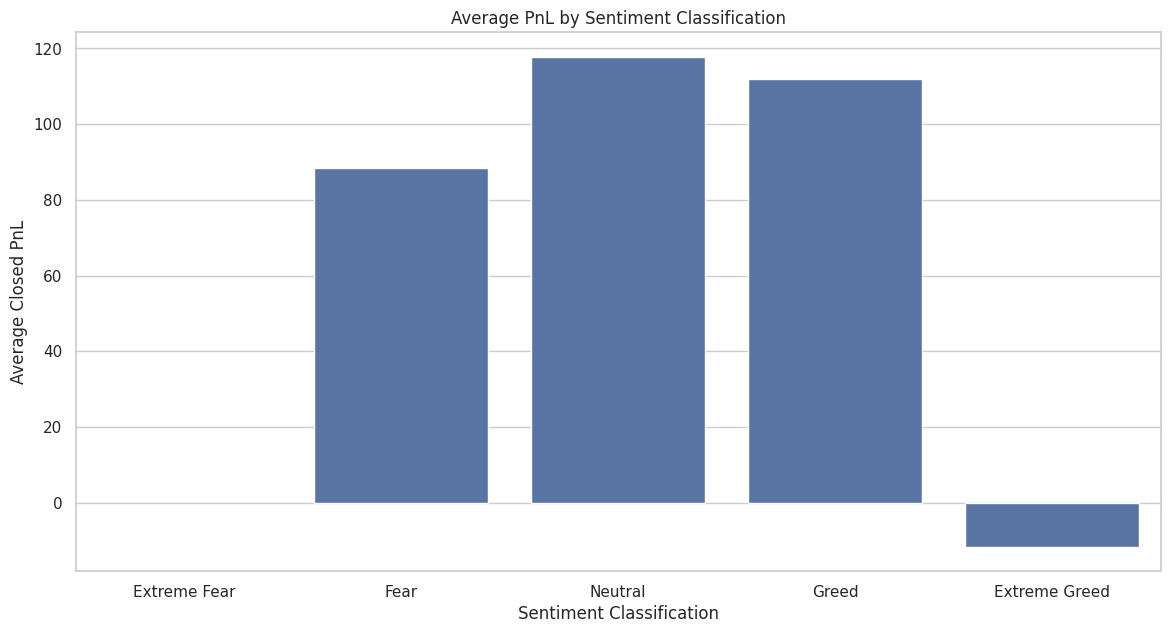

In [48]:
if len(df_pnl_events) > 0:
   # Visualizations for performance by classification
  plt.figure(figsize=(14, 7))
  sns.barplot(data=performance_by_classification, x='classification', y='mean_pnl')
  plt.title('Average PnL by Sentiment Classification')
  plt.ylabel('Average Closed PnL')
  plt.xlabel('Sentiment Classification')
  plt.show()

else:
    print("Skipping EDA Part 2 as df_pnl_events is empty.")

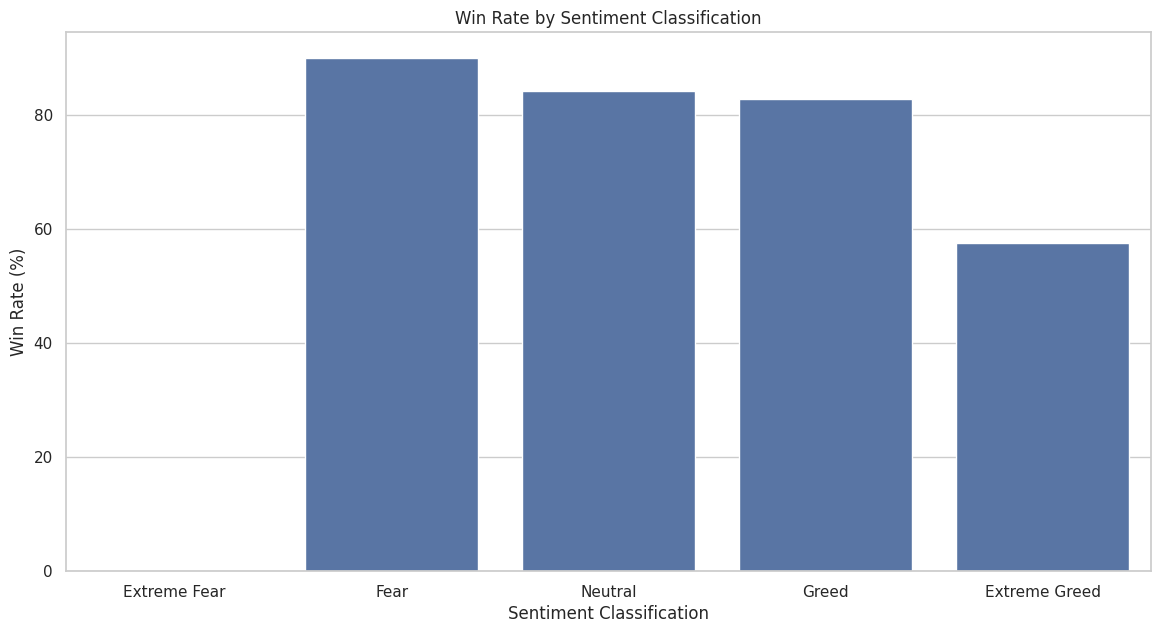

In [49]:
# Performance by Sentiment

if len(df_pnl_events) > 0:
    # Visualizations for performance by classification
    plt.figure(figsize=(14, 7))
    sns.barplot(data=performance_by_classification, x='classification', y='win_rate')
    plt.title('Win Rate by Sentiment Classification')
    plt.ylabel('Win Rate (%)')
    plt.xlabel('Sentiment Classification')
    plt.show()

else:
    print("Skipping EDA Part 2 as df_pnl_events is empty.")

In [50]:
if len(df_pnl_events) > 0:
  print("\n--- Performance by Numerical Sentiment 'value' (Binned) ---")
  # Create bins for the sentiment 'value'
  # Bins: 0-20 (Extreme Fear), 21-40 (Fear), 41-60 (Neutral), 61-80 (Greed), 81-100 (Extreme Greed)
  # These are approximate bins based on common F&G index interpretations
  bins = [0, 20, 40, 60, 80, 101] # 101 to include 100
  labels = ['0-20 (Ext.Fear)', '21-40 (Fear)', '41-60 (Neutral)', '61-80 (Greed)', '81-100 (Ext.Greed)']
  df_pnl_events['sentiment_value_bin'] = pd.cut(df_pnl_events['value'], bins=bins, labels=labels, right=False) # right=False means [start, end)

  performance_by_value_bin = df_pnl_events.groupby('sentiment_value_bin')['closed_pnl'].agg(
      count='count',
      sum_pnl='sum',
      mean_pnl='mean',
       median_pnl='median'
   ).reset_index()

  win_rate_by_value_bin = df_pnl_events.groupby('sentiment_value_bin')['is_win'].mean().reset_index()
  win_rate_by_value_bin.rename(columns={'is_win': 'win_rate'}, inplace=True)
  win_rate_by_value_bin['win_rate'] *= 100

  performance_by_value_bin = pd.merge(performance_by_value_bin, win_rate_by_value_bin, on='sentiment_value_bin')

  print(performance_by_value_bin)
else:
  print("Skipping EDA Part 2 as df_pnl_events is empty.")


--- Performance by Numerical Sentiment 'value' (Binned) ---
  sentiment_value_bin  count        sum_pnl    mean_pnl  median_pnl   win_rate
0     0-20 (Ext.Fear)      0       0.000000         NaN         NaN        NaN
1        21-40 (Fear)      0       0.000000         NaN         NaN        NaN
2     41-60 (Neutral)   6909  614030.757337   88.874042    7.080000  90.013026
3       61-80 (Greed)    935  104565.859356  111.835144   16.486635  82.887701
4  81-100 (Ext.Greed)    680   -7906.299208  -11.626911    0.006058  57.647059


/tmp/ipython-input-3367465802.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  performance_by_value_bin = df_pnl_events.groupby('sentiment_value_bin')['closed_pnl'].agg(
/tmp/ipython-input-3367465802.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  win_rate_by_value_bin = df_pnl_events.groupby('sentiment_value_bin')['is_win'].mean().reset_index()


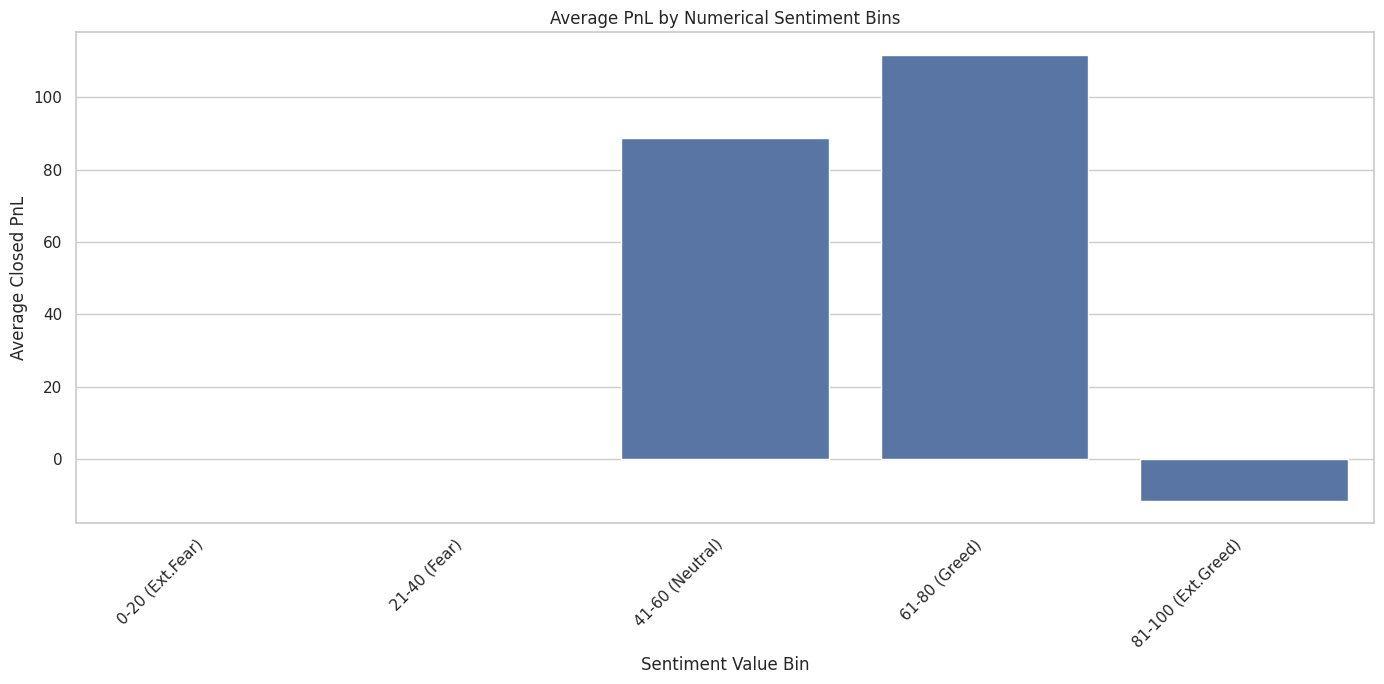

In [51]:
if len(df_pnl_events) > 0:

  plt.figure(figsize=(14, 7))
  sns.barplot(data=performance_by_value_bin, x='sentiment_value_bin', y='mean_pnl')
  plt.title('Average PnL by Numerical Sentiment Bins')
  plt.ylabel('Average Closed PnL')
  plt.xlabel('Sentiment Value Bin')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

else:
  print("Skipping EDA Part 2 as df_pnl_events is empty.")

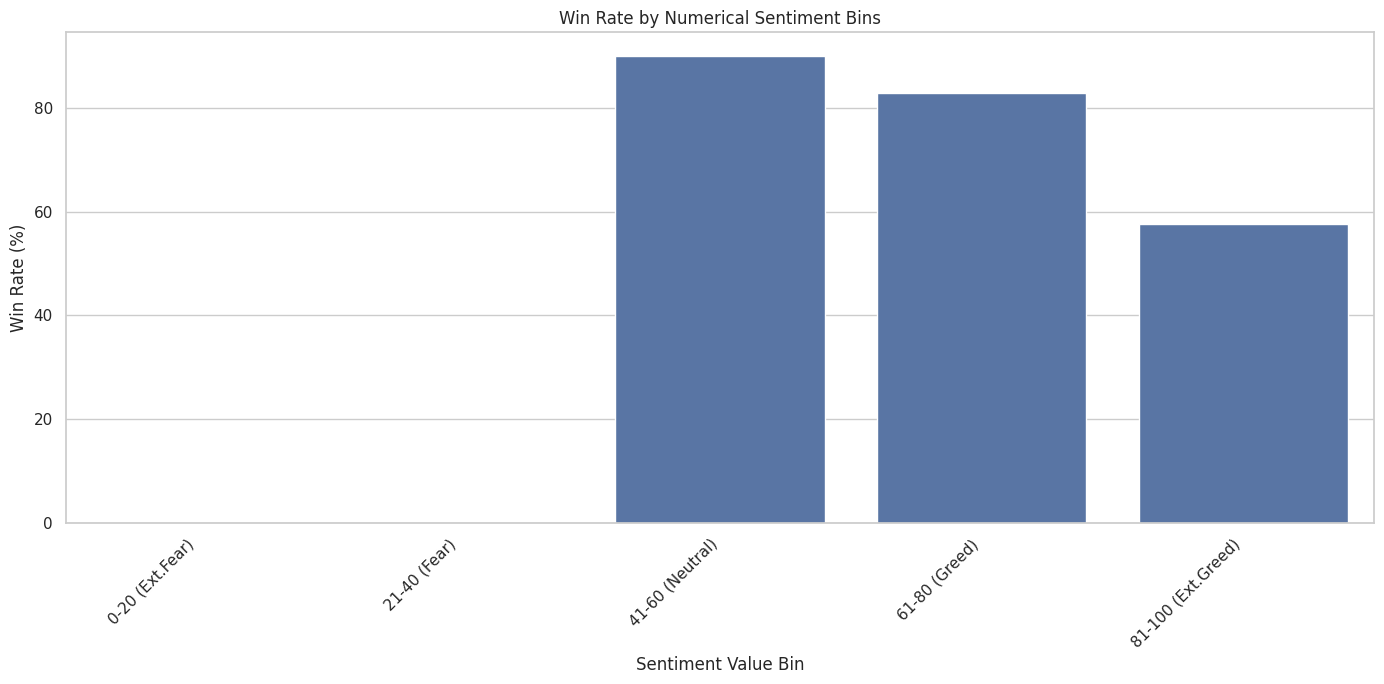

In [52]:
if len(df_pnl_events) > 0:
  plt.figure(figsize=(14, 7))
  sns.barplot(data=performance_by_value_bin, x='sentiment_value_bin', y='win_rate')
  plt.title('Win Rate by Numerical Sentiment Bins')
  plt.ylabel('Win Rate (%)')
  plt.xlabel('Sentiment Value Bin')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

else:
  print("Skipping EDA Part 2 as df_pnl_events is empty.")

#5.2 Investigating the Numerical Value of "Fear" Classification


--- Distribution of Numerical Sentiment 'value' for Trades Classified as 'Fear' ---
count    6820.0
mean       44.0
std         0.0
min        44.0
25%        44.0
50%        44.0
75%        44.0
max        44.0
Name: value, dtype: float64


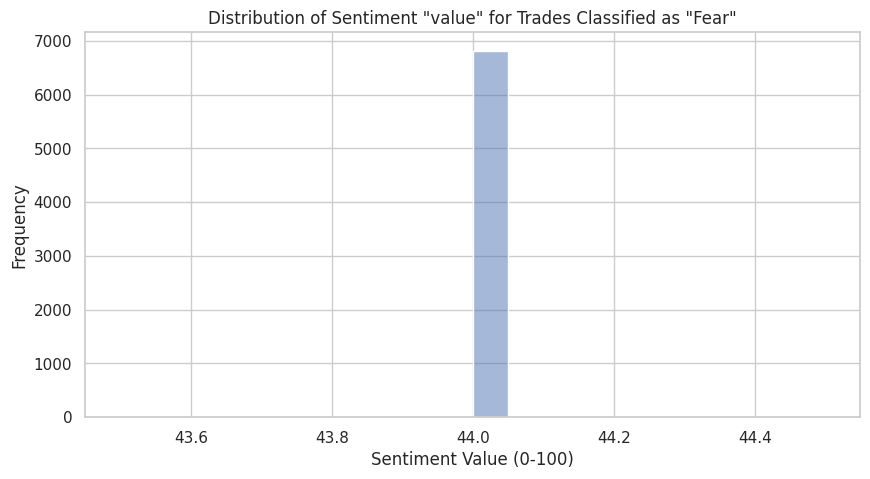

In [53]:
#  Investigate 'value' distribution for "Fear" classification

if len(df_pnl_events) > 0:
  fear_trades_df = df_pnl_events[df_pnl_events['classification'] == 'Fear']
  if not fear_trades_df.empty:
    print("\n--- Distribution of Numerical Sentiment 'value' for Trades Classified as 'Fear' ---")
    print(fear_trades_df['value'].describe())

    plt.figure(figsize=(10, 5))
    sns.histplot(data=fear_trades_df, x='value', bins=20, kde=True)
    plt.title('Distribution of Sentiment "value" for Trades Classified as "Fear"')
    plt.xlabel('Sentiment Value (0-100)')
    plt.ylabel('Frequency')
    plt.show()
  else:
    print("No trades classified as 'Fear' found in df_pnl_events to analyze.")

else:
  print("Skipping investigation as df_pnl_events is empty.")

#5.3 Trader Behavior by Market Sentiment


--- Average Trade Size (USD) by Sentiment Classification (PnL Events) ---
  classification  mean_size_usd  median_size_usd  count
1           Fear   25154.366784         2336.815   6820
3        Neutral    7776.635506         2440.310     89
2          Greed   20150.710299         7398.950    935
0  Extreme Greed    8517.133956         1979.225    680


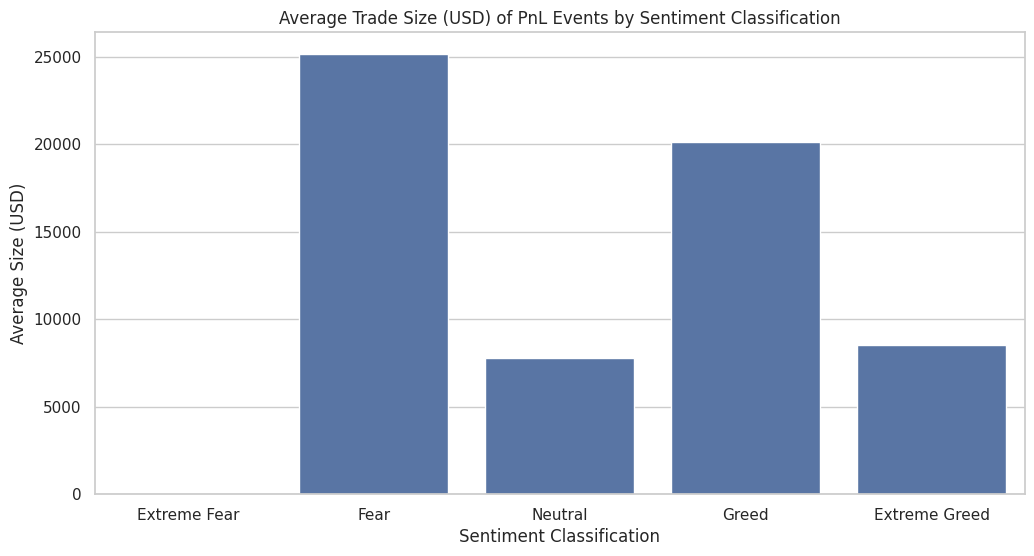

In [54]:
# Trader Behavior by Sentiment

if len(df_pnl_events) > 0: # We use df_pnl_events for consistency, but some behaviors apply to all events in df_analysis

  print("\n--- Average Trade Size (USD) by Sentiment Classification (PnL Events) ---")
  # For PnL events, size_usd represents the size of the closing part of the trade
  avg_size_by_classification = df_pnl_events.groupby('classification')['size_usd'].agg(
    mean_size_usd='mean',
    median_size_usd='median',
    count='count' # To see number of PnL events per category again
  ).reset_index()

  avg_size_by_classification['classification'] = pd.Categorical(avg_size_by_classification['classification'], categories=sentiment_order, ordered=True)
  avg_size_by_classification = avg_size_by_classification.sort_values('classification')
  print(avg_size_by_classification)

  plt.figure(figsize=(12, 6))
  sns.barplot(data=avg_size_by_classification, x='classification', y='mean_size_usd')
  plt.title('Average Trade Size (USD) of PnL Events by Sentiment Classification')
  plt.ylabel('Average Size (USD)')
  plt.xlabel('Sentiment Classification')
  plt.show()

else:
  print("Skipping EDA Part 3 as df_pnl_events is empty.")


In [55]:
if len(df_pnl_events) > 0: # We use df_pnl_events for consistency, but some behaviors apply to all events in df_analysis

  # Now let's look at ALL events in df_analysis
  # to see opening behavior / general activity.
  print("\n--- Event Type Frequency by Sentiment Classification (All BTC Events with Sentiment) ---")
  event_type_distribution = df_analysis.groupby(['classification', 'event_type']).size().reset_index(name='count')

  print("Top event types per sentiment classification (all BTC events with sentiment):")
  for sentiment_class in df_analysis['classification'].unique():
    if pd.notna(sentiment_class): # Handle potential NaN if any slip through
      print(f"\nSentiment: {sentiment_class}")

      # Simpler print of value counts directly from df_analysis
      print(df_analysis[df_analysis['classification'] == sentiment_class]['event_type'].value_counts().nlargest(5))

else:
  print("Skipping EDA Part 3 as df_pnl_events is empty.")


--- Event Type Frequency by Sentiment Classification (All BTC Events with Sentiment) ---
Top event types per sentiment classification (all BTC events with sentiment):

Sentiment: Fear
event_type
Open Long       7439
Close Long      5067
Open Short      2526
Close Short     1753
Short > Long       5
Name: count, dtype: int64

Sentiment: Greed
event_type
Open Long       881
Close Long      582
Open Short      482
Close Short     353
Short > Long      1
Name: count, dtype: int64

Sentiment: Extreme Greed
event_type
Open Short      585
Close Short     517
Open Long       178
Close Long      163
Short > Long      4
Name: count, dtype: int64

Sentiment: Neutral
event_type
Open Long      92
Close Long     70
Open Short     36
Close Short    19
Name: count, dtype: int64


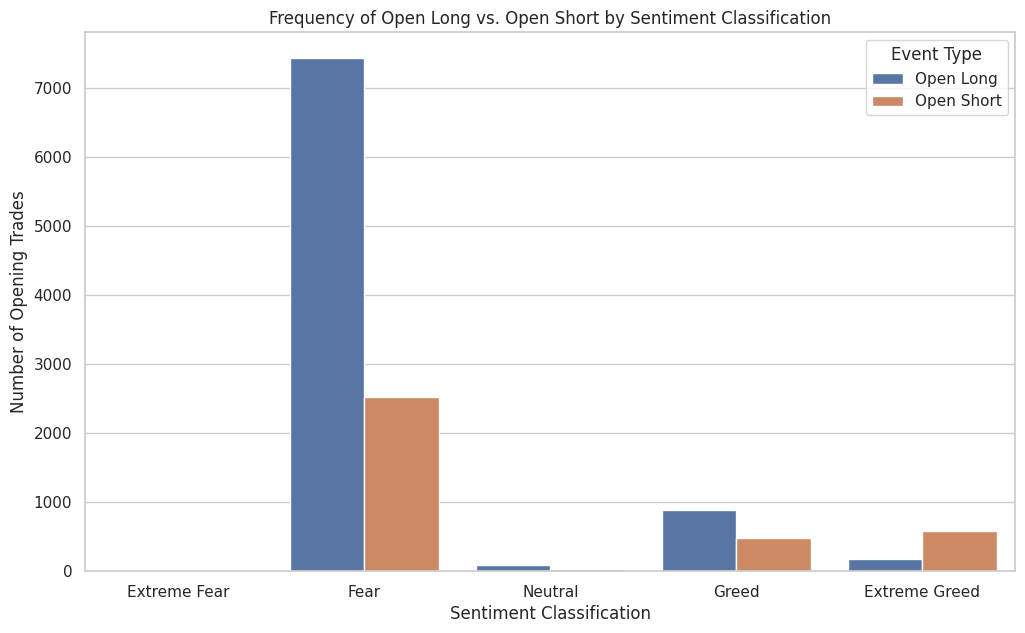

In [56]:

if len(df_pnl_events) > 0: # We use df_pnl_events for consistency, but some behaviors apply to all events in df_analysis

  # We can also look at the proportion of Open Long vs Open Short
  open_events = df_analysis[df_analysis['event_type'].isin(['Open Long', 'Open Short'])]
  if not open_events.empty:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=open_events, x='classification', hue='event_type', order=sentiment_order)
    plt.title('Frequency of Open Long vs. Open Short by Sentiment Classification')
    plt.ylabel('Number of Opening Trades')
    plt.xlabel('Sentiment Classification')
    plt.legend(title='Event Type')
    plt.show()
  else:
    print("No 'Open Long' or 'Open Short' events found in df_analysis to plot.")

else:
  print("Skipping EDA Part 3 as df_pnl_events is empty.")

# **6. Insights & Conclusion**